In [1]:
import fastreg as fr
from fastreg import I, R, C, D, B, factor

In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
# generate random testing data
data = fr.dataset(N=100_000, K1=10, K2=100, models=['linear', 'poisson'])
data

,id1,id2,x1,x2,yhat0,yhat,yhat1,y0,y,Ep0,Ep,Ep1,p0,p,p1
0,E,37,-0.259664,0.957506,0.596604,1.366604,0.996604,0.140456,3.450027,1.815941,3.922009,2.709066,1,0,4
1,I,65,0.334285,-1.045791,-0.427189,1.022811,0.372811,-0.551597,0.954923,0.652340,2.781001,1.451810,2,1,1
2,I,10,0.067322,-0.631068,-0.258444,0.641556,0.541556,-0.682874,1.517074,0.772252,1.899434,1.718679,0,4,1
3,I,10,0.384297,0.485393,0.506525,1.406525,1.306525,-0.236097,3.559011,1.659514,4.081746,3.693317,3,2,5
4,G,38,-1.584996,-1.037097,-0.997757,-0.017757,-0.397757,-1.692442,-2.045029,0.368706,0.982400,0.671825,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,D,73,0.624556,0.857360,0.801783,1.831783,1.101783,-0.951971,2.520384,2.229513,6.245012,3.009527,2,5,6
99996,D,53,2.040068,-0.346070,0.504379,1.334379,0.804379,0.245231,0.334883,1.655956,3.797635,2.235307,2,5,2
99997,J,40,0.423945,0.758248,0.682132,1.982132,1.582132,-1.915105,1.672198,1.978091,7.258203,4.865319,3,7,6
99998,D,90,-0.232874,-0.372146,-0.193150,1.006850,0.106850,-0.774781,0.737252,0.824358,2.736966,1.112767,0,2,2


### Formulas

`Factor` — a column or expression

`Term` — a combination of `Factor`s

`Formula` — a combination of unique `Term`s

Built in `Factor`s are: `[R]eal`, `[C]ategorical`, `[I]ntercept`, `[D]emeaned`, and `[B]inned`

In [4]:
# pure [R]eal (a factor)
R('x1')

R(x1)

In [5]:
# convenience method for simple columns
R.x1

R(x1)

In [6]:
# interacted [R]eals (a term)
R.x1*R.x2

R(x1)*R(x2)

In [7]:
# add in [I]ntercept and [C]ategorical (a formula)
I + R.x1*R.x2 + C.id1

I + R(x1)*R(x2) + C(id1)

In [8]:
# pure [B]inned column
B('x1', 10)

C(x1:bin10)

In [9]:
# add in [B]inned and [D]emeaned (a formula)
I + B.x1(10)*R.x1 + D.x2('id1')

I + C(x1:bin10)*R(x1) + R(x2-μ|id1)

In [10]:
# use general python expressions in factors
I + R('abs(x1)') + C('x2 > 0')

I + R(abs(x1)) + C(x2 > 0)

### Interfaces

In [11]:
# pythonic formula
fr.ols(y=R.y, x=I+R.x1+R.x2+C.id1+C.id2, data=data)

y,coeff,stderr,low95,high95,pvalue
I,0.152789,0.033121,0.087873,0.217705,3.968445e-06
x1,0.295420,0.003172,0.289203,0.301637,0.000000e+00
x2,0.593774,0.003153,0.587595,0.599954,0.000000e+00
id1=B,0.071617,0.014167,0.043850,0.099384,4.298797e-07
id1=C,0.167662,0.014115,0.139997,0.195327,0.000000e+00
...,...,...,...,...,...
id2=95,0.863448,0.044494,0.776242,0.950654,0.000000e+00
id2=96,0.950444,0.045121,0.862008,1.038879,0.000000e+00
id2=97,0.961423,0.044398,0.874405,1.048441,0.000000e+00
id2=98,0.978801,0.044968,0.890666,1.066936,0.000000e+00


In [12]:
# R style formula
form = 'y ~ 1 + x1 + x2 + C(id1) + C(id2)'
fr.ols(formula=form, data=data)

y,coeff,stderr,low95,high95,pvalue
I,0.152789,0.033121,0.087873,0.217705,3.968445e-06
x1,0.295420,0.003172,0.289203,0.301637,0.000000e+00
x2,0.593774,0.003153,0.587595,0.599954,0.000000e+00
id1=B,0.071617,0.014167,0.043850,0.099384,4.298797e-07
id1=C,0.167662,0.014115,0.139997,0.195327,0.000000e+00
...,...,...,...,...,...
id2=95,0.863448,0.044494,0.776242,0.950654,0.000000e+00
id2=96,0.950444,0.045121,0.862008,1.038879,0.000000e+00
id2=97,0.961423,0.044398,0.874405,1.048441,0.000000e+00
id2=98,0.978801,0.044968,0.890666,1.066936,0.000000e+00


In [13]:
# tuple/list style formula
fr.ols(y='y', x=['1', 'x1', 'x2', C('id1'), C('id2')], data=data)

y,coeff,stderr,low95,high95,pvalue
1,0.152789,0.033121,0.087873,0.217705,3.968445e-06
x1,0.295420,0.003172,0.289203,0.301637,0.000000e+00
x2,0.593774,0.003153,0.587595,0.599954,0.000000e+00
id1=B,0.071617,0.014167,0.043850,0.099384,4.298797e-07
id1=C,0.167662,0.014115,0.139997,0.195327,0.000000e+00
...,...,...,...,...,...
id2=95,0.863448,0.044494,0.776242,0.950654,0.000000e+00
id2=96,0.950444,0.045121,0.862008,1.038879,0.000000e+00
id2=97,0.961423,0.044398,0.874405,1.048441,0.000000e+00
id2=98,0.978801,0.044968,0.890666,1.066936,0.000000e+00


### Extras

In [14]:
# demeaned in action (x1 unconditional, x2 conditional on id1)
fr.ols(y=R.y, x=I+D.x1+D.x2('id1'), data=data)

y,coeff,stderr,low95,high95,pvalue
I,1.048618,0.003414,1.041927,1.055310,0.0
x1-μ,0.295601,0.003419,0.288900,0.302302,0.0
x2-μ|id1,0.592314,0.003398,0.585653,0.598974,0.0


In [15]:
# quantile binning (x2 on deciles, self interacted)
fr.ols(y=R.y, x=I+R.x1+B.x2(10)*R.x2, data=data)

pruning 4/9 unused categories


y,coeff,stderr,low95,high95,pvalue
I,0.695596,0.004402,0.686968,0.704224,0.0
x1,0.295830,0.003552,0.288868,0.302791,0.0
(x2:bin10=5)*x2,1.208609,0.024713,1.160172,1.257045,0.0
(x2:bin10=6)*x2,0.958135,0.009374,0.939762,0.976508,0.0
(x2:bin10=7)*x2,0.799903,0.008249,0.783734,0.816071,0.0
(x2:bin10=8)*x2,0.743773,0.012602,0.719074,0.768472,0.0
(x2:bin10=9)*x2,0.744002,0.031666,0.681937,0.806066,0.0


In [16]:
# hdfe — fast for one categorical term
fr.ols(y=R.y, x=I+R.x1+R.x2, hdfe=C.id1*C.id2, data=data)

y,coeff,stderr,low95,high95,pvalue
I,0.158384,0.106767,-0.050876,0.367643,0.137954
x1,0.295242,0.003188,0.288993,0.301491,0.000000
x2,0.593225,0.003168,0.587015,0.599434,0.000000
"id1=A,id2=1",-0.068296,0.143535,-0.349619,0.213026,0.634205
"id1=A,id2=2",0.059658,0.154722,-0.243593,0.362908,0.699808
...,...,...,...,...,...
"id1=J,id2=95",1.515430,0.142673,1.235796,1.795064,0.000000
"id1=J,id2=96",1.640398,0.152318,1.341859,1.938936,0.000000
"id1=J,id2=97",1.525558,0.145391,1.240597,1.810518,0.000000
"id1=J,id2=98",1.778260,0.144439,1.495165,2.061355,0.000000


In [17]:
# absorbtion — fast but no std errors
fr.ols(y=R.y, x=I+R.x1+R.x2, absorb=C.id1*C.id2, data=data)

y,coeff,stderr,low95,high95,pvalue
I,1.049263,0.002852,1.043674,1.054853,0.0
x1,0.295420,0.003129,0.289287,0.301553,0.0
x2,0.593774,0.003251,0.587402,0.600146,0.0


In [18]:
# clustered standard errors (any term allowed)
fr.ols(y=R.y, x=I+R.x1+R.x2+C.id1+C.id2, cluster=C.id1*C.id2, data=data)

y,coeff,stderr,low95,high95,pvalue
I,0.152789,0.027124,0.099627,0.205951,1.771259e-08
x1,0.295420,0.003129,0.289287,0.301553,0.000000e+00
x2,0.593774,0.003251,0.587402,0.600147,0.000000e+00
id1=B,0.071617,0.011754,0.048580,0.094655,1.108260e-09
id1=C,0.167662,0.012462,0.143238,0.192086,0.000000e+00
...,...,...,...,...,...
id2=95,0.863448,0.038707,0.787583,0.939313,0.000000e+00
id2=96,0.950444,0.036558,0.878791,1.022096,0.000000e+00
id2=97,0.961423,0.043568,0.876032,1.046814,0.000000e+00
id2=98,0.978801,0.036580,0.907106,1.050496,0.000000e+00


### GLM

In [19]:
fr.poisson(y=R.p, x=I+R.x1+R.x2+C.id1+C.id2, data=data)

[  0] 0.14707: 0.18867 0.18417
[  4] 2.45403: 0.43924 0.33615
[  8] 2.52732: 0.44318 0.32669
[ 12] 2.52870: 0.41885 0.35802
[ 16] 2.52899: 0.40896 0.37392


p,coeff,stderr,low95,high95,pvalue
I,0.321686,0.019546,0.283377,0.359994,0.000000e+00
x1,0.294262,0.001604,0.291119,0.297405,0.000000e+00
x2,0.597357,0.001639,0.594146,0.600569,0.000000e+00
id1=B,0.071730,0.009106,0.053883,0.089578,3.330669e-15
id1=C,0.178240,0.008865,0.160865,0.195614,0.000000e+00
...,...,...,...,...,...
id2=95,0.705279,0.022416,0.661344,0.749214,0.000000e+00
id2=96,0.710406,0.022954,0.665416,0.755396,0.000000e+00
id2=97,0.750968,0.022392,0.707081,0.794855,0.000000e+00
id2=98,0.776814,0.022524,0.732668,0.820959,0.000000e+00


In [20]:
fr.poisson(y=R.p, x=I+R.x1+R.x2+C.id1, hdfe=C.id2, data=data)

[  0] 0.14707: 0.18867 0.18417
[  4] 2.45403: 0.43924 0.33615
[  8] 2.52732: 0.44318 0.32669
[ 12] 2.52870: 0.41885 0.35802
[ 16] 2.52899: 0.40896 0.37392


p,coeff,stderr,low95,high95,pvalue
I,0.321686,0.019546,0.283377,0.359995,0.000000e+00
x1,0.294262,0.001604,0.291120,0.297405,0.000000e+00
x2,0.597357,0.001639,0.594146,0.600569,0.000000e+00
id1=B,0.071730,0.009106,0.053883,0.089578,3.330669e-15
id1=C,0.178240,0.008865,0.160865,0.195615,0.000000e+00
...,...,...,...,...,...
id2=95,0.705279,0.022416,0.661344,0.749214,0.000000e+00
id2=96,0.710406,0.022954,0.665416,0.755396,0.000000e+00
id2=97,0.750968,0.022392,0.707080,0.794856,0.000000e+00
id2=98,0.776814,0.022524,0.732668,0.820959,0.000000e+00


### Accuracy

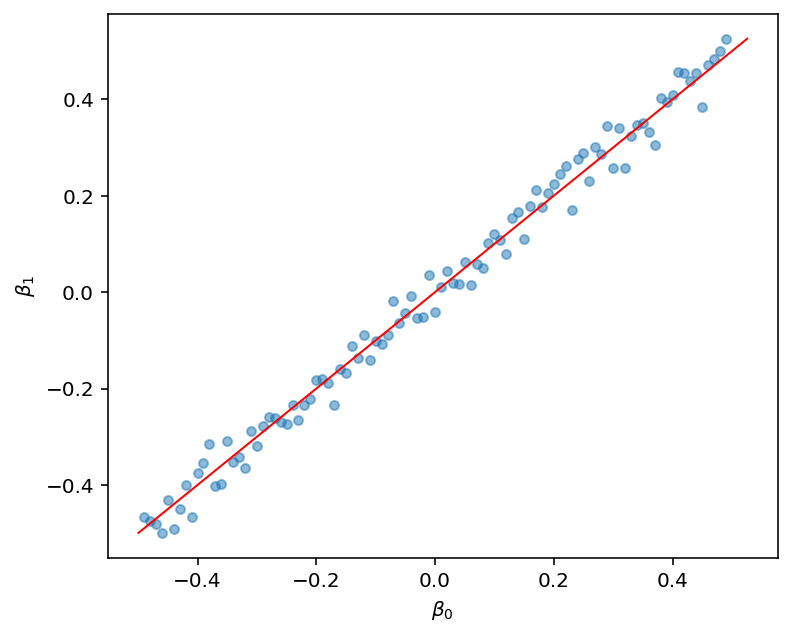

In [21]:
# how do we do on ids?
fr.testing.test_ols(data, plot=True);

[  0] 0.14707: 0.18867 0.18417
[  4] 2.45403: 0.43924 0.33615
[  8] 2.52732: 0.44318 0.32669
[ 12] 2.52870: 0.41885 0.35802
[ 16] 2.52899: 0.40896 0.37392


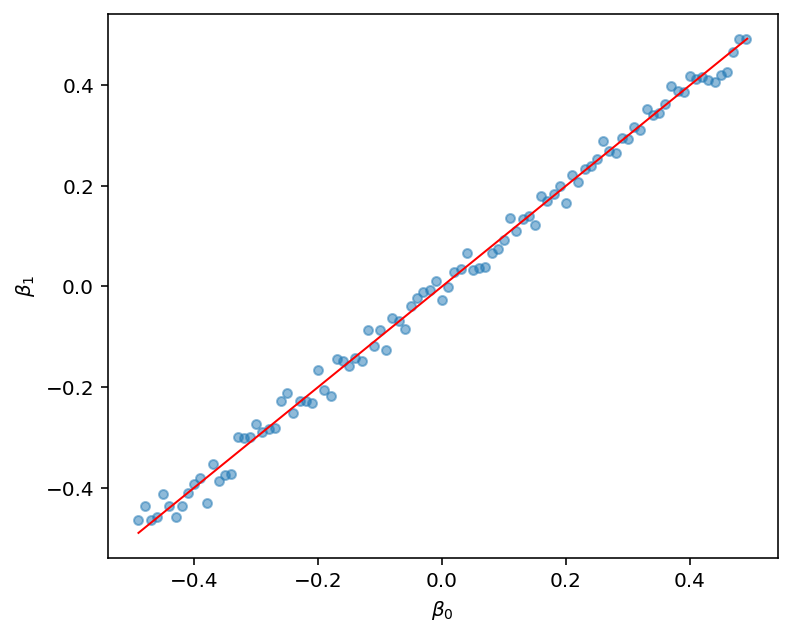

In [22]:
# slow on first run, try it twice
fr.testing.test_glm(data, plot=True);

### Custom Factors

In [23]:
# simple factor
@factor
def demean(x):
    return x - np.mean(x)
fact = demean.x1
print(fact)
fact.eval(data)

R(demean(x1))


array([-0.25711825,  0.3368306 ,  0.06986831, ...,  0.42649083,
       -0.23032792, -0.22113526])

In [24]:
# complex factor
@factor(eval_args=(0, 1))
def cdemean(x, i):
    datf = pd.DataFrame({'vals': x, 'cond': i})
    cmean = datf.groupby('cond')['vals'].mean().rename('mean')
    datf = datf.join(cmean, on='cond')
    return datf['vals'] - datf['mean']
cfact = cdemean('x1', 'id1')
print(cfact)
cfact.eval(data)

R(cdemean(x1,id1))


array([-0.26656654,  0.33078962,  0.06382733, ...,  0.44321344,
       -0.23794522, -0.22717624])

In [25]:
# named factor
@factor(name=lambda x: f'{x}-μ')
def ndemean(x):
    return x - np.mean(x)
nfact = ndemean.x1
print(nfact)
nfact.eval(data)

R(x1-μ)


array([-0.25711825,  0.3368306 ,  0.06986831, ...,  0.42649083,
       -0.23032792, -0.22113526])

In [26]:
# inject into eval namespace (note @ required to reference)
logit = lambda x: 1/(1+np.exp(-x))
lfact = R('@logit(x1)')
print(lfact)
lfact.eval(data, extern={'logit': logit})

R(@logit(x1))


array([0.43544623, 0.5828015 , 0.51682421, ..., 0.60442681, 0.44204318,
       0.44431166])

In [27]:
# create custom factor (somewhat more elegant)
flogit = factor(logit, name='logit')
lfact = flogit('x1')
print(lfact)
lfact.eval(data)

R(logit(x1))


array([0.43544623, 0.5828015 , 0.51682421, ..., 0.60442681, 0.44204318,
       0.44431166])